In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath('../..'))
import torch
import numpy as np
import utils
import matplotlib.pyplot as plt
%load_ext autoreload
np.random.seed(2) 
torch.manual_seed(2)

## load a checkpoint & dataset the network trained on

In [4]:
lcs = utils.get_data('../../datasets/ZTF_i')


validated 3399 files out of 3399 for band='i'
created union_tp attribute of length 3500
dataset created w/ shape (1726, 1, 539, 3)
train size: 1553, valid size: 156, test size: 173


In [5]:
net, optimizer, args, epoch, loss, train_loss, test_loss = utils.load_checkpoint('../checkpoints/i/ZTF_i0.2490505427122116.h5', lcs.data_obj)


=> loading checkpoint '../checkpoints/i/ZTF_i0.2490505427122116.h5'
Namespace(n_union_tp=3500, data_folder='datasets/ZTF_i', checkpoint='datasets/ZTF_i0.5990962982177734.h5', start_col=1, inc_errors=False, print_at=1, embed_time=128, enc_num_heads=16, latent_dim=64, mixing='concat', num_ref_points=16, rec_hidden=128, width=512, save_at=30, patience=100, early_stopping=False, niters=20000, frac=0.5, batch_size=2, mse_weight=5.0, dropout=0.0, num_resamples=0, lr=5e-06, scheduler=False, warmup=4000, kl_zero=False, kl_annealing=True, net='hetvae', device='mps', const_var=False, var_per_dim=False, std=0.1, seed=2, save=True, k_iwae=1)


# Plot Learning curves

[<AxesSubplot:title={'center':'Learning Curves for i model'}>
 <AxesSubplot:> <AxesSubplot:xlabel='Epoch'>]


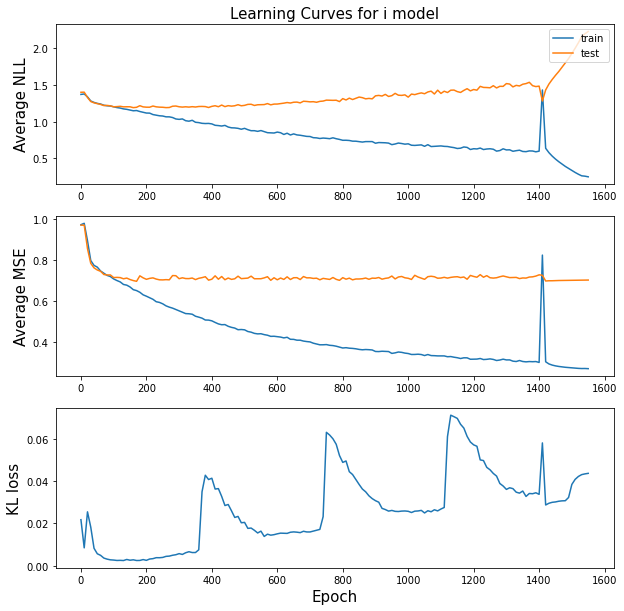

In [9]:
train_l = np.array(train_loss)
test_l = np.array(test_loss)
fs = 15
fig, ax = plt.subplots(3, figsize=(10,10))
ax[0].set_title('Learning Curves for i model',fontsize=fs)
ax[2].set_xlabel('Epoch',fontsize=fs)
print(ax)
## NLL
x = np.arange(0,len(train_loss)*10,10) # took metrics every 10 itrs
ax[0].plot(x,train_l[:,0], label='train')
ax[0].plot(x,test_l[:,0], label='test')
#ax[0].set_ylim(0.3,5)
ax[0].legend(loc="upper right")
ax[0].set_ylabel('Average NLL',fontsize=fs)

## MSE
ax[1].plot(x, train_l[:,1], label='train')
ax[1].plot(x, test_l[:,1], label='test')
ax[1].set_ylabel('Average MSE',fontsize=fs)

## KL Annealing
ax[2].plot(x,train_l[:,2])
ax[2].set_ylabel('KL loss',fontsize=fs)

plt.savefig('../img/learning_curves/ilc')

In [7]:
print(f'final losses:\n train {train_l[-1]},\n test {test_l[-1]}')

final losses:
 train [0.24905054 0.26815283 0.04363019],
 test [2.23174524 0.70041418]


## test loss runs away ....

In [9]:
net, optimizer, args, epoch, loss, train_loss, test_loss = utils.load_checkpoint('../checkpoints/i/ZTF_i-0.00143141346052289.h5', lcs.data_obj)


=> loading checkpoint '../checkpoints/i/ZTF_i-0.00143141346052289.h5'
Namespace(n_union_tp=3500, data_folder='datasets/ZTF_i', checkpoint='datasets/ZTF_i-0.0028381862211972475.h5', start_col=1, inc_errors=False, print_at=1, embed_time=128, enc_num_heads=16, latent_dim=64, mixing='concat', num_ref_points=16, rec_hidden=128, width=512, save_at=30, patience=100, early_stopping=False, niters=20000, frac=0.5, batch_size=2, mse_weight=5.0, dropout=0.0, num_resamples=0, lr=5e-08, scheduler=False, warmup=4000, kl_zero=False, kl_annealing=True, net='hetvae', device='mps', const_var=False, var_per_dim=False, std=0.1, seed=2, save=True, k_iwae=1)


[<AxesSubplot:title={'center':'Learning Curves for i model'}>
 <AxesSubplot:> <AxesSubplot:xlabel='Epoch'>]


Text(0, 0.5, 'KL loss')

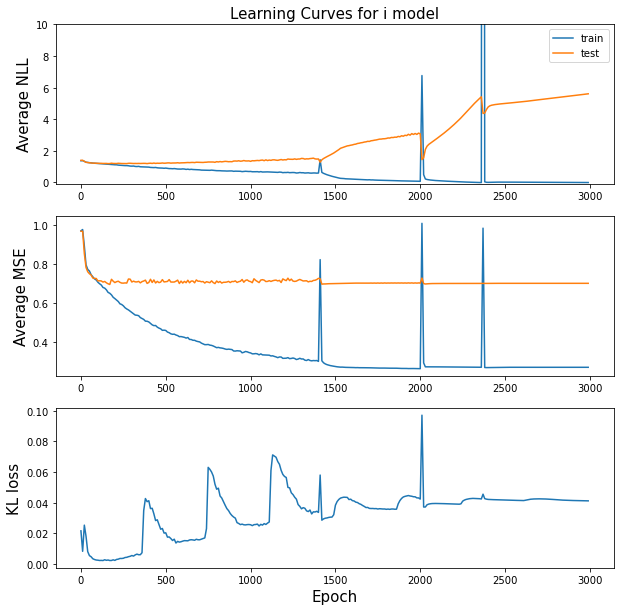

In [16]:
train_l = np.array(train_loss)
test_l = np.array(test_loss)
fs = 15
fig, ax = plt.subplots(3, figsize=(10,10))
ax[0].set_title('Learning Curves for i model',fontsize=fs)
ax[2].set_xlabel('Epoch',fontsize=fs)
print(ax)
## NLL
x = np.arange(0,len(train_loss)*10,10) # took metrics every 10 itrs
ax[0].plot(x,train_l[:,0], label='train')
ax[0].plot(x,test_l[:,0], label='test')
ax[0].set_ylim(-0.1,10)
ax[0].legend(loc="upper right")
ax[0].set_ylabel('Average NLL',fontsize=fs)

## MSE
ax[1].plot(x, train_l[:,1], label='train')
ax[1].plot(x, test_l[:,1], label='test')
ax[1].set_ylabel('Average MSE',fontsize=fs)

## KL Annealing
ax[2].plot(x,train_l[:,2])
ax[2].set_ylabel('KL loss',fontsize=fs)

#plt.savefig('../img/learning_curves/gilc')